<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/ML/LogisticRegression/LogisticRegressionMultiplePredictorVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns


In Scikit-Learn, the ***load_breast_cancer()*** function is used to load the Breast Cancer Wisconsin (Diagnostic) dataset. This dataset is a commonly used binary classification dataset for machine learning tasks

In [ ]:
data = load_breast_cancer()

X = data.data # Features
y = data.target # Target tabels

# Print shape
print(f"X - {X.shape}") # it has 569 rows and 30 columns (features)
print(f"y- {y.shape}")

feature_names = data.feature_names
target_names = data.target_names

print(f"Input features - {feature_names}")
print(f"\n Target classes - {target_names}")

# Print dataset details
print(data.DESCR)


X - (569, 30)
y- (569,)
Input features - ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Target classes - ['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
 

Visualize the data

Scatter plots to visualize the relationship between individual features and the target labels.


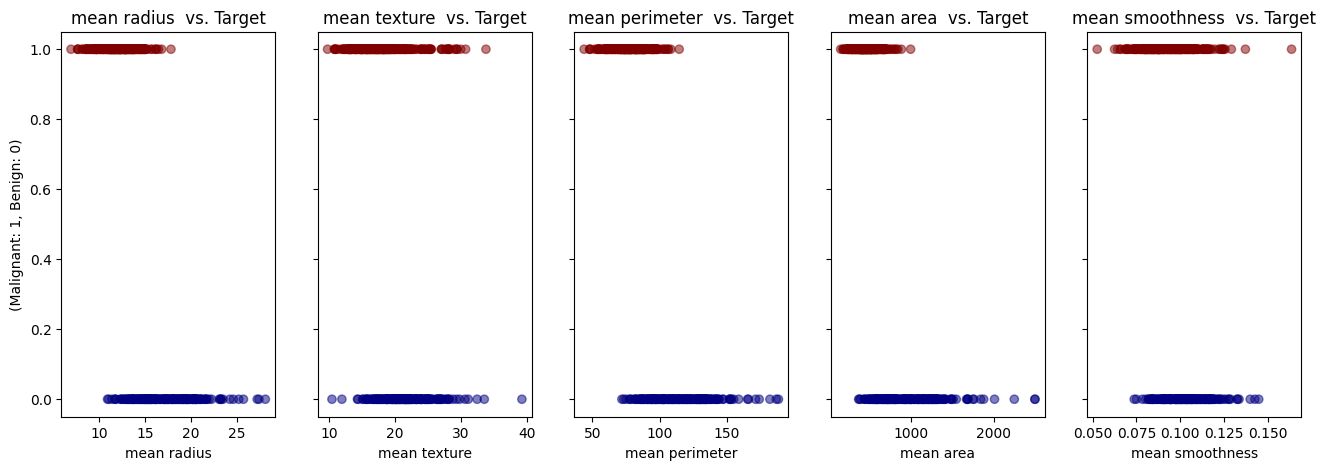

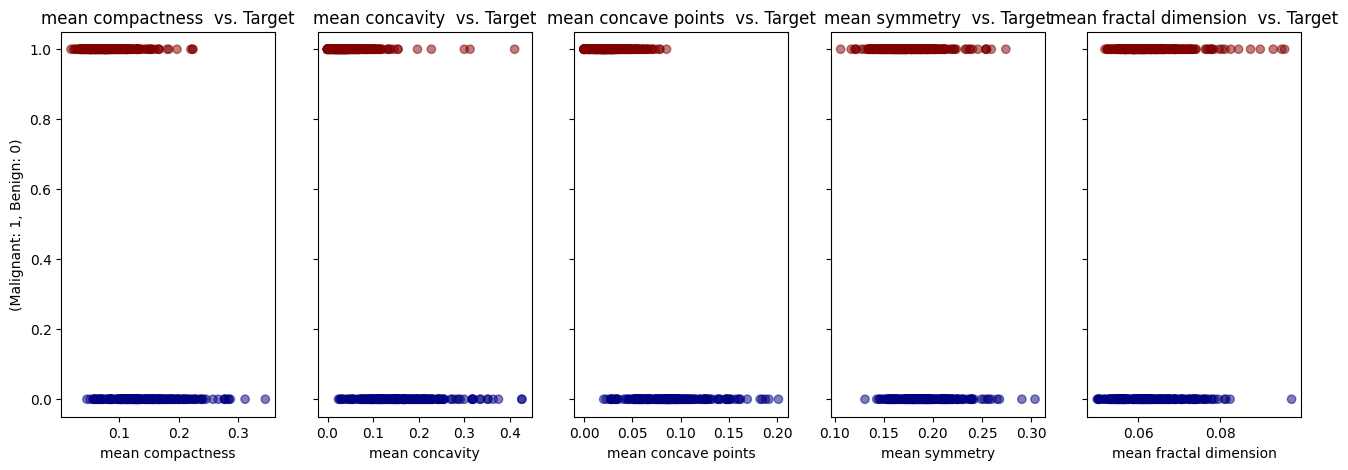

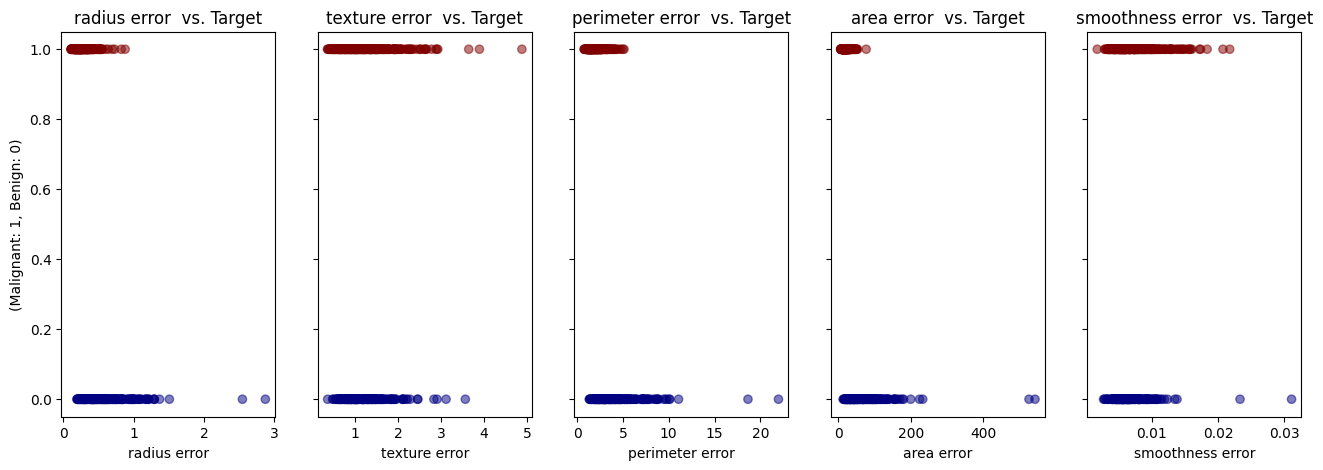

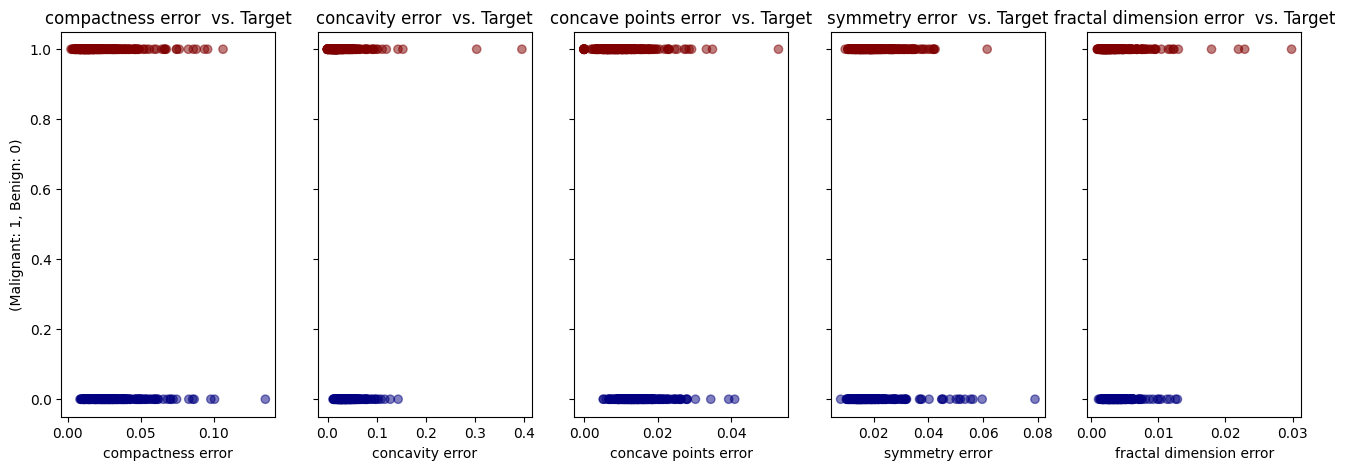

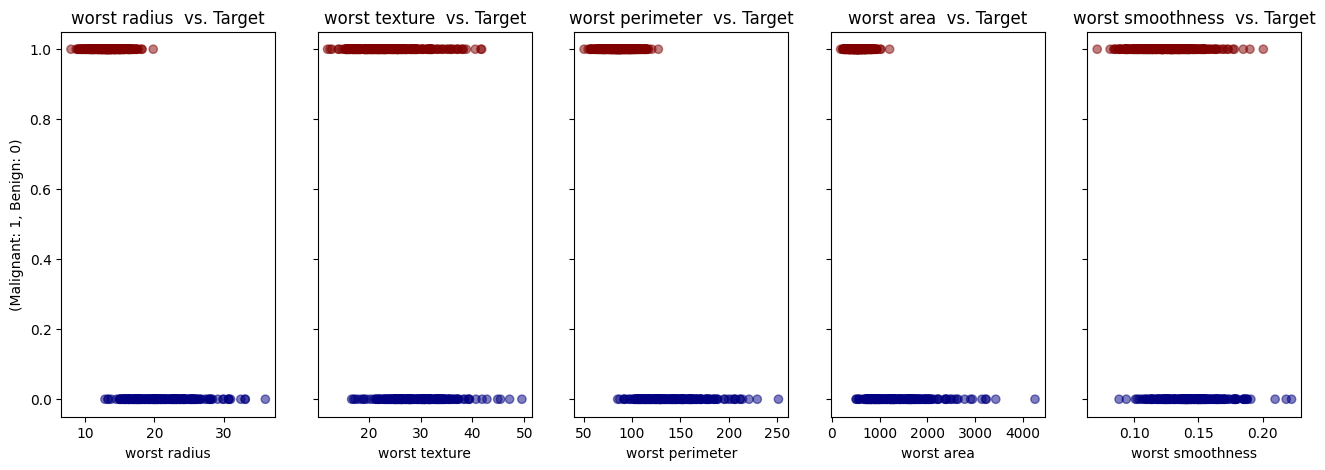

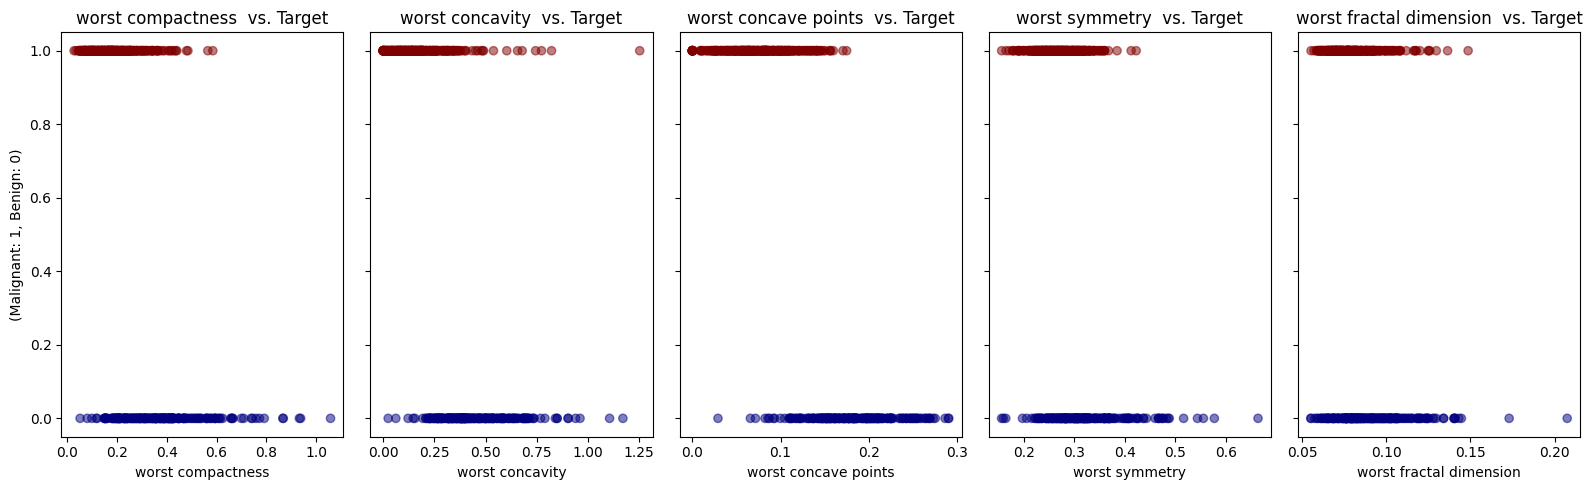

In [ ]:

rows = int(len(feature_names) / 5) # row counter for plot
k = 0 # feature counter

for row in range(0,rows):
  fig, axes = plt.subplots(1, 5, figsize=(16, 5), sharey=True)
  i = 0 # figure counter goes till 5
  while k < len(feature_names):
    ax = axes[i]
    ax.scatter(X[:, k], y, alpha=0.5,c=y, cmap='jet')
    ax.set_xlabel(feature_names[k])
    if i==0:
      ax.set_ylabel('(Malignant: 1, Benign: 0)')
    ax.set_title(f'{feature_names[k]}  vs. Target')
    k+=1
    i+=1
    if k % 5 == 0:
      break


plt.tight_layout()
plt.show()

Box plot to show the distribution

- Assuming you have a DataFrame df with data
- You can specify the x and y variables for the box plot
- x should be a categorical variable, and y is the numerical data


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0           0.1184   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.2776          0.3001               0.1471         0.2419   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   

   worst symmetry  worst fractal dimension  target  
0          0.4601                   0.1189       0  

[1 rows x 31 columns]


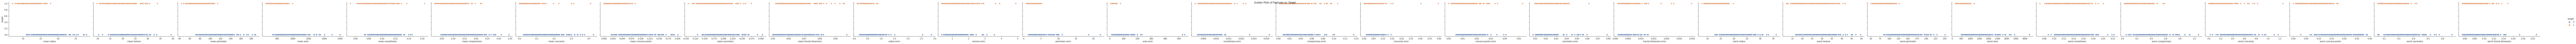

In [ ]:
# create pandas df from X and y
df = pd.DataFrame(data = X, columns=feature_names)
df['target'] = y
print(df.head(1))

# Box and Vilin plot to show the distribution
# for i in range(0, len(feature_names)):
#   sns.violinplot(x='target', y=feature_names[i], data=df)
#   plt.title(f'Violin Plot of {feature_names[i]} vs target')
#   plt.xlabel('Malignant vs Benign')
#   plt.ylabel(f'{feature_names[i]}')

# Create a pair plot for each feature against the target variable
sns.pairplot(df, x_vars=df.columns[:-1], y_vars='target',
             kind='scatter',
             hue='target',
             palette='deep',
             height=3,
             aspect=2)
# Set the title for the pair plot
plt.suptitle("Scatter Plots of Features vs. Target")

# Show the plot
plt.show()


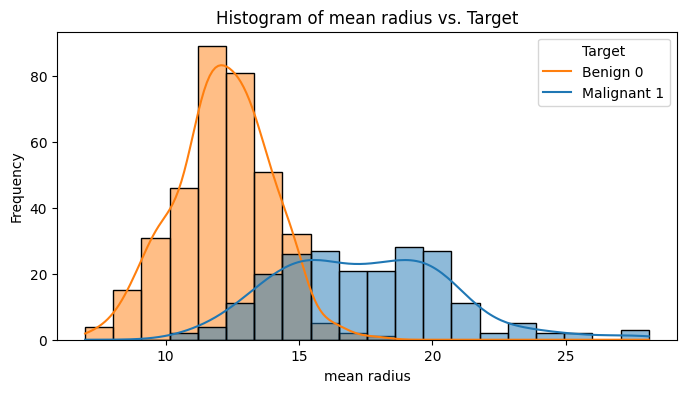

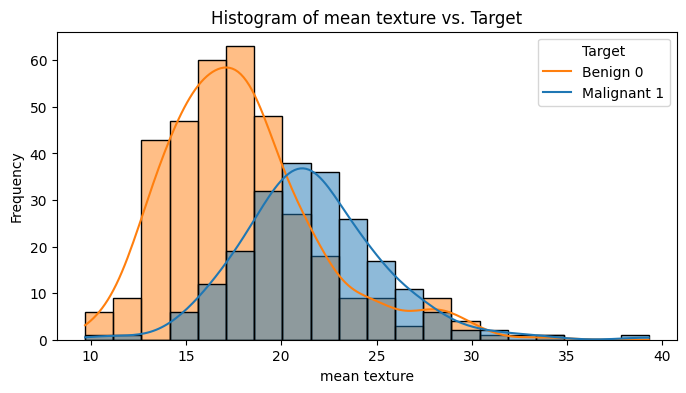

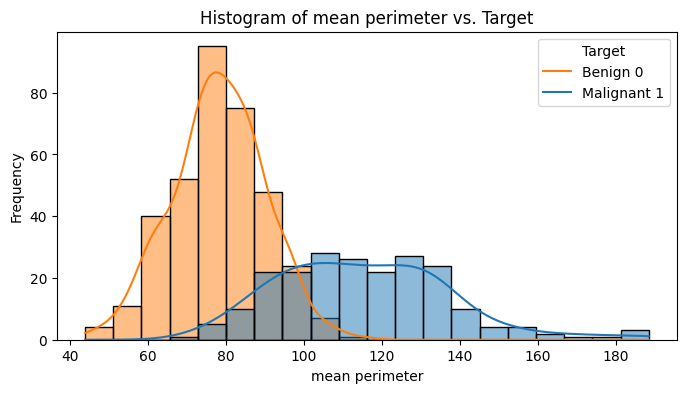

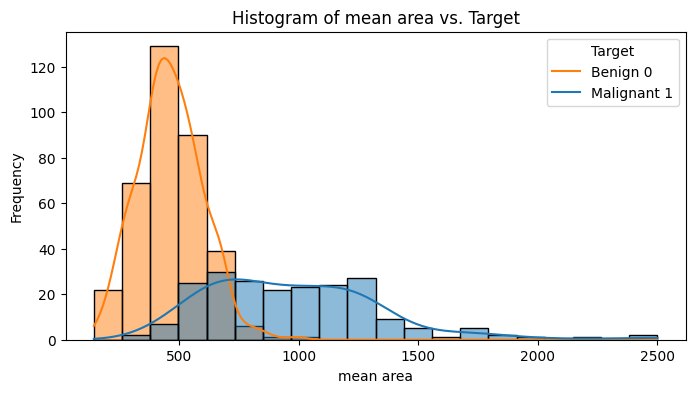

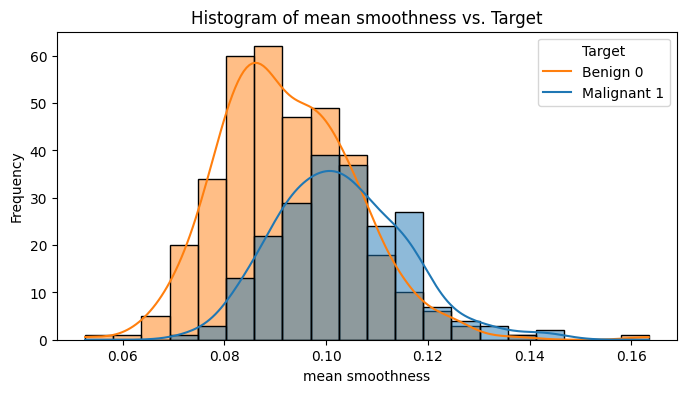

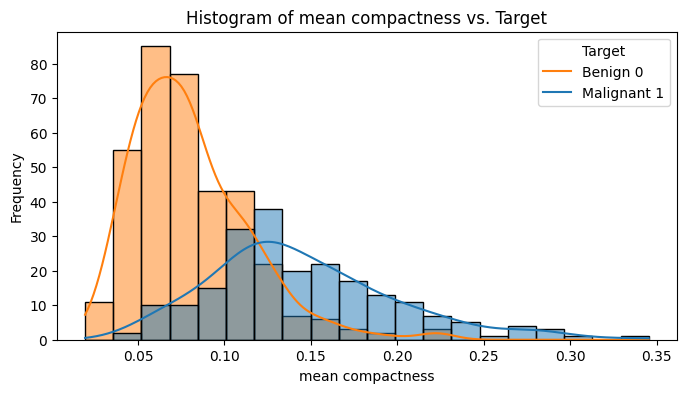

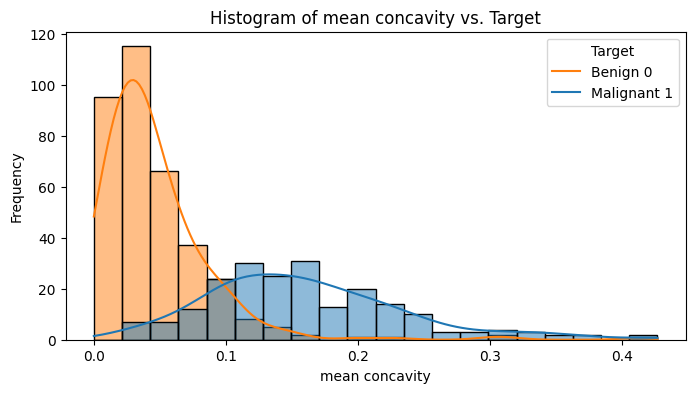

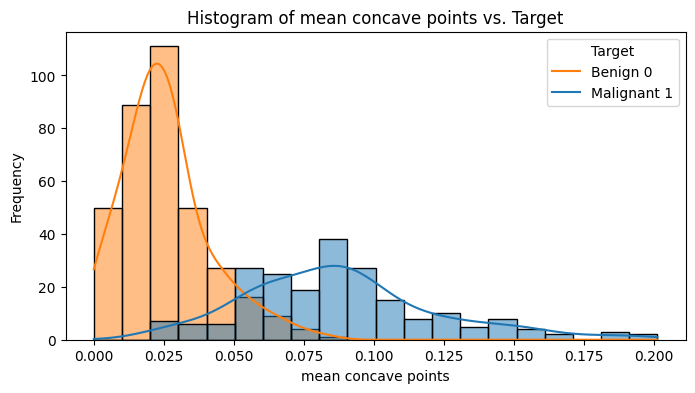

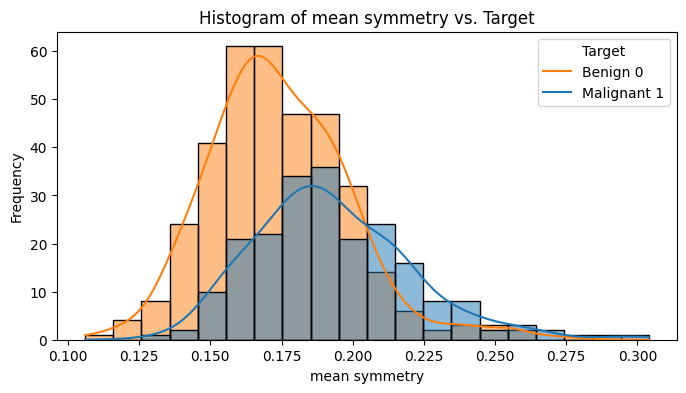

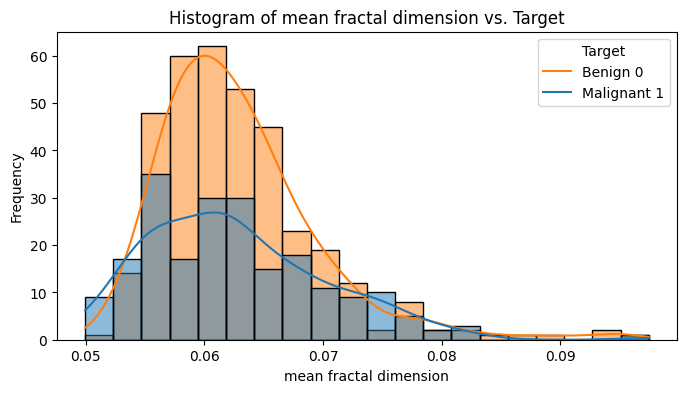

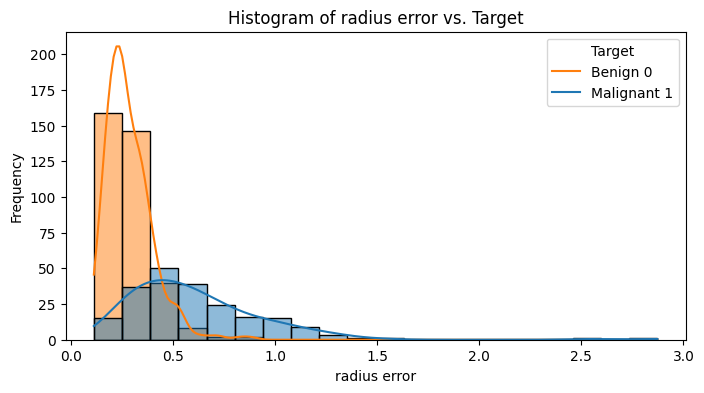

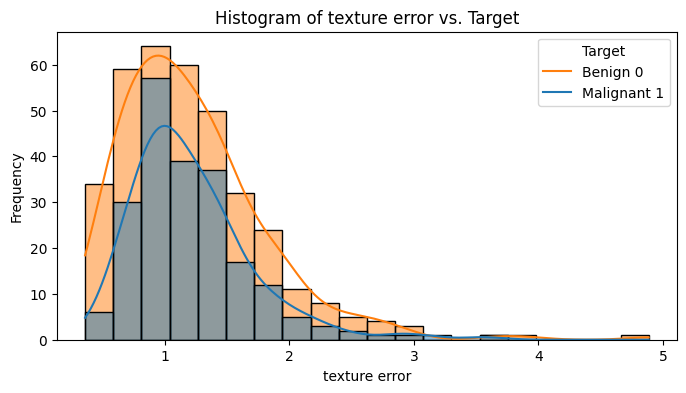

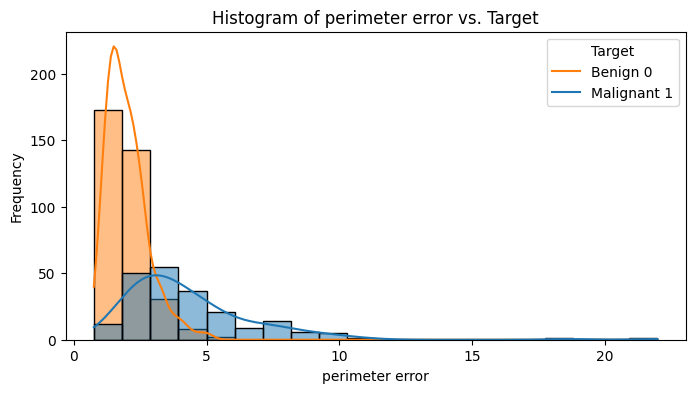

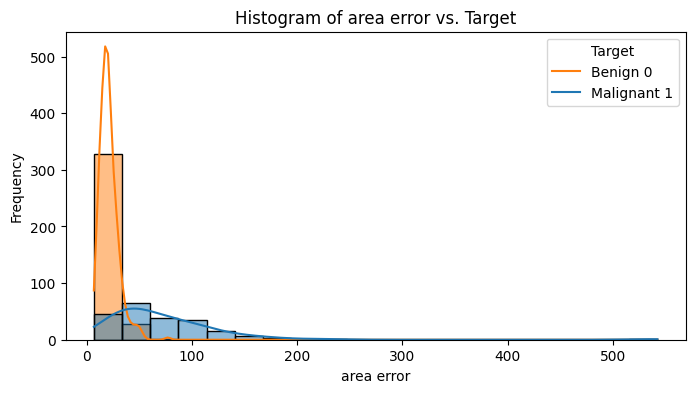

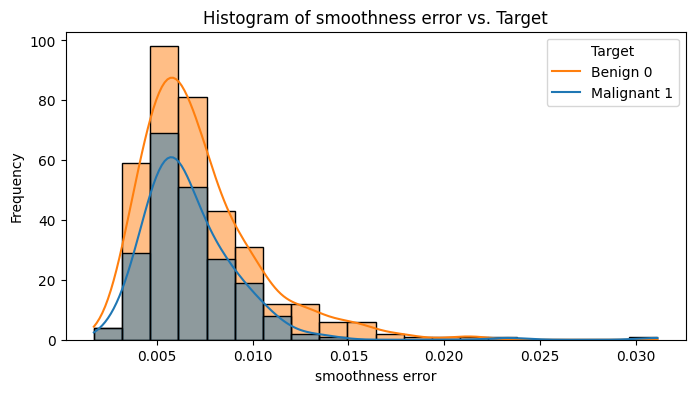

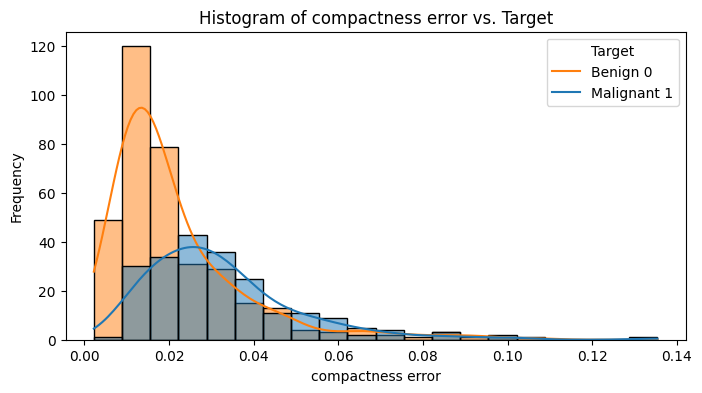

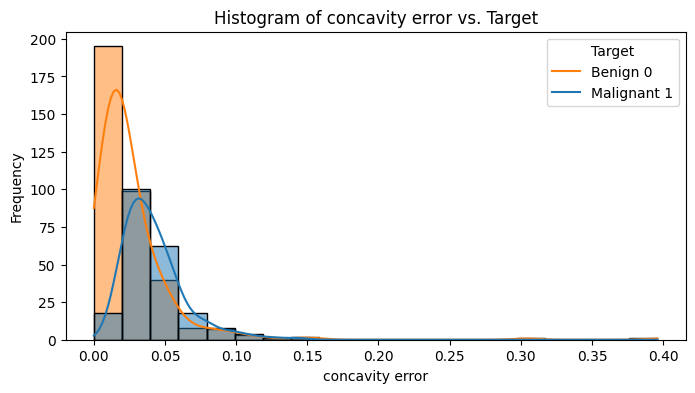

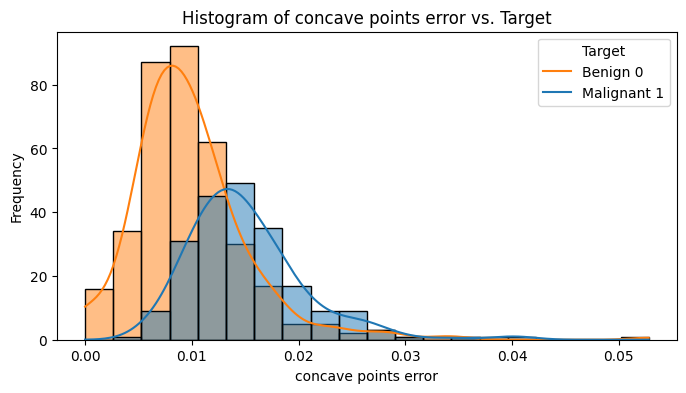

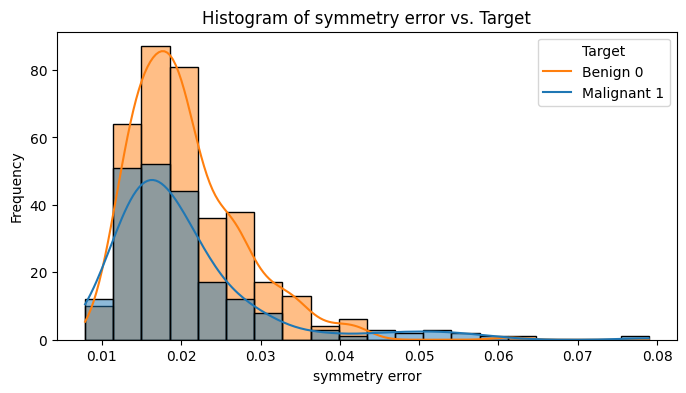

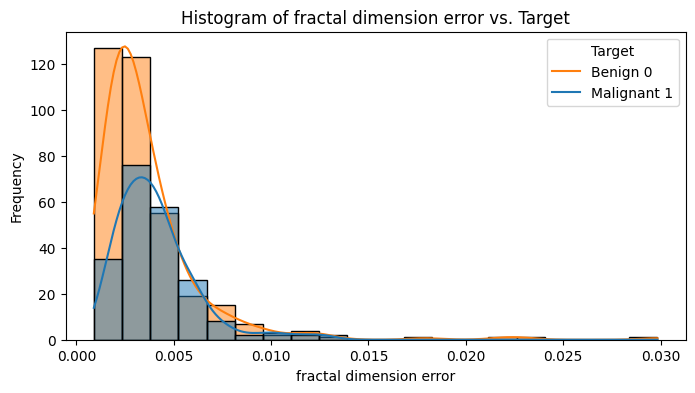

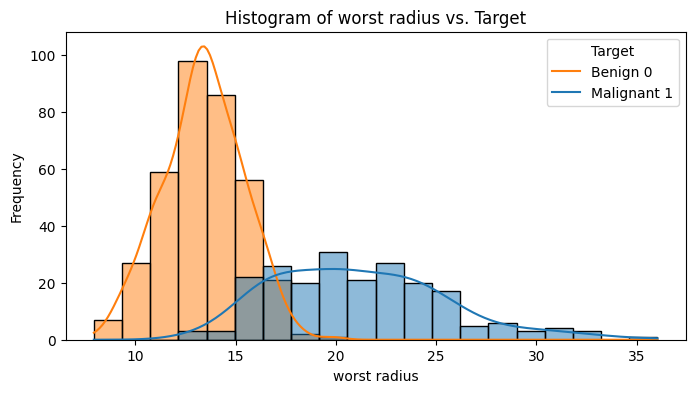

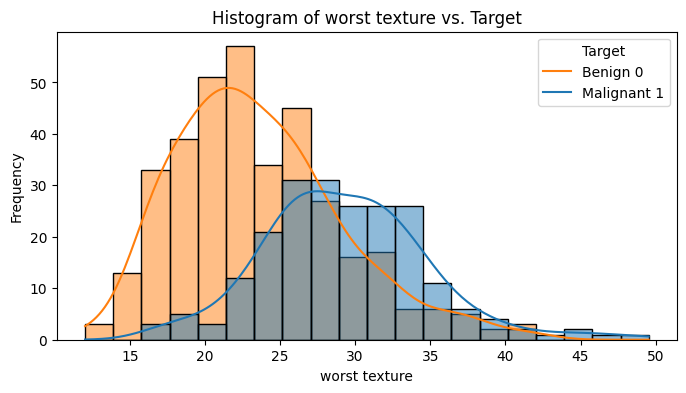

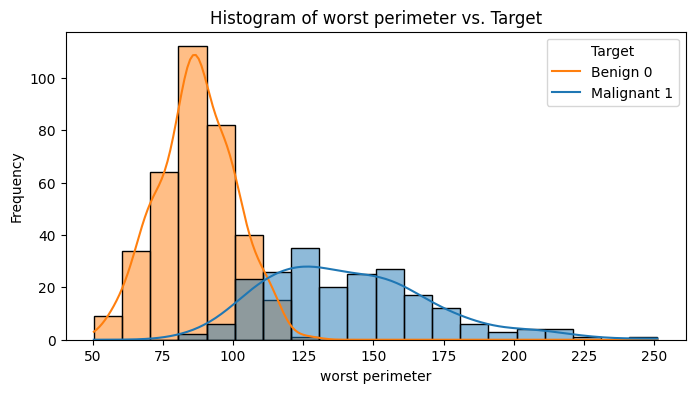

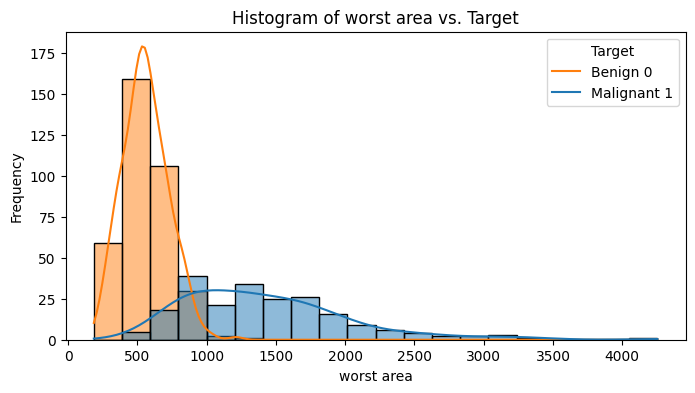

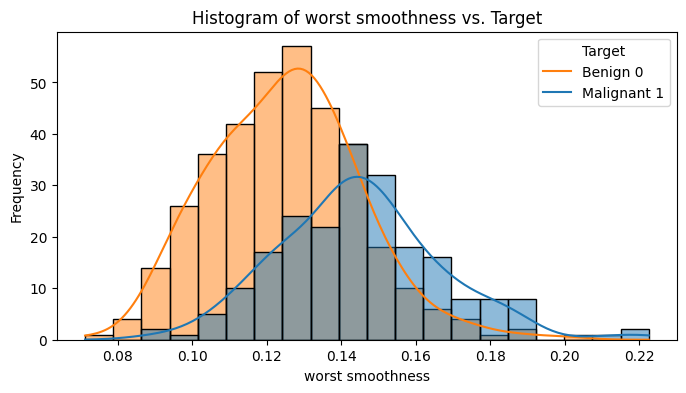

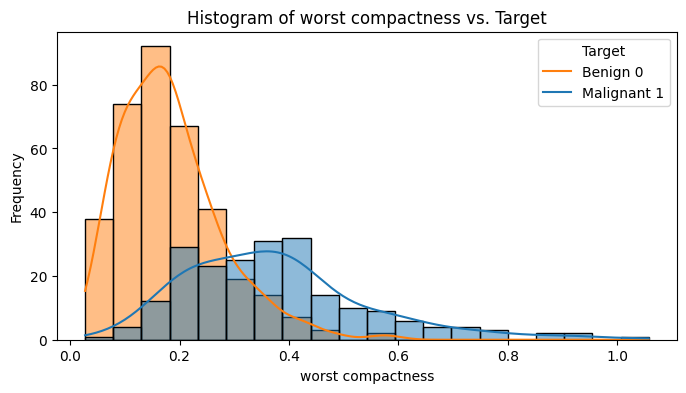

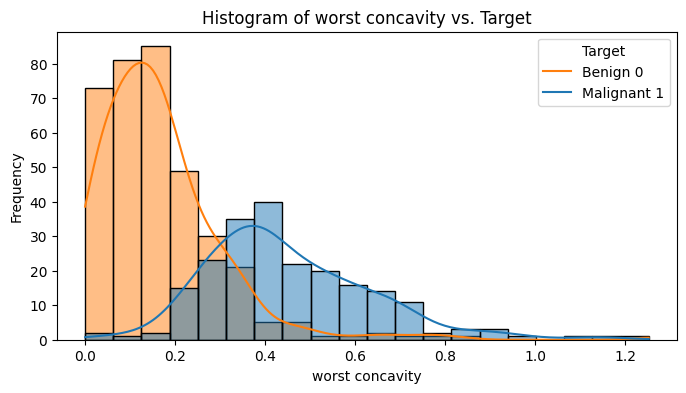

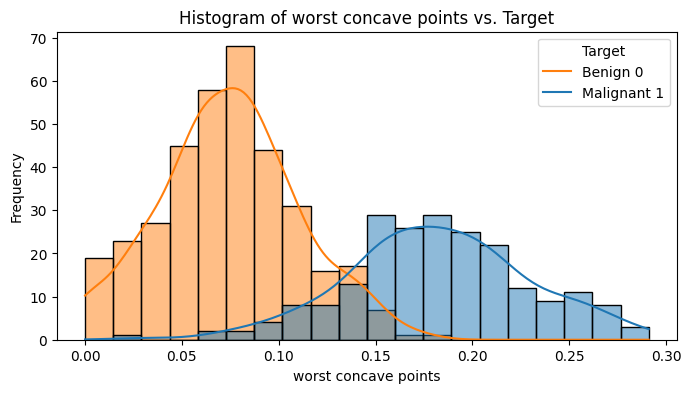

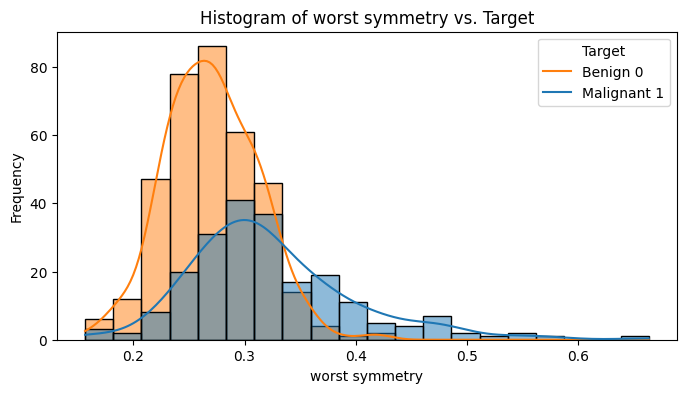

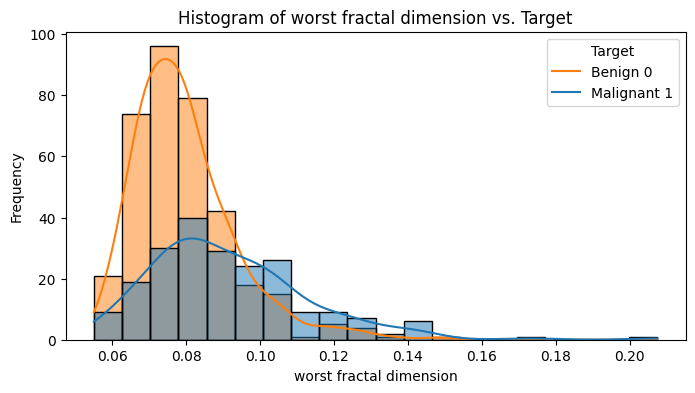

In [ ]:
# List of feature columns (excluding the target column which is last one)
feature_columns = df.columns[:-1]

# Set the number of bins for the histograms
num_bins = 20

# Loop through each feature and create a histogram against the target variable
for feature in feature_columns:
    plt.figure(figsize=(8, 4))  # Set the figure size for each plot
    sns.histplot(data=df, x=feature, hue='target', bins=num_bins, kde=True, common_norm=False)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} vs. Target')
    plt.legend(title='Target', labels=['Benign 0', 'Malignant 1'])  # Assuming binary classification
    plt.show()


Split the dataset into train and test sets

X_train, y_train
X_test, y_test

In [ ]:
def split_train_test(X, y, ratio):
  total_samples = len(X)
  train_sample_len = round(total_samples * ratio)
  print(f"{train_sample_len}")

  X_train = X[:train_sample_len, :]
  y_train = y[:train_sample_len,]

  X_test = X[train_sample_len:, :]
  y_test = y[train_sample_len:,]

  print(f"{X_train.shape} - {y_train.shape}")
  print(f"{X_test.shape} - {y_test.shape}")
  return X_train, X_test, y_train, y_test

split_train_test(X, y, 0.7)

398
(398, 30) - (398,)
(171, 30) - (171,)


(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.406e+01, 1.718e+01, 8.975e+01, ..., 7.911e-02, 2.523e-01,
         6.609e-02],
        [1.351e+01, 1.889e+01, 8.810e+01, ..., 1.453e-01, 2.666e-01,
         7.686e-02],
        [1.280e+01, 1.746e+01, 8.305e+01, ..., 8.296e-02, 1.988e-01,
         7.053e-02]]),
 array([[1.106e+01, 1.483e+01, 7.031e+01, ..., 5.556e-02, 2.590e-01,
         9.158e-02],
        [1.180e+01, 1.726e+01, 7.526e+01, ..., 5.356e-02, 2.779e-01,
         8.121e-02],
        [1.791e+01, 2.102e+01, 1.244e+02, ..., 1.964e-01, 3.245e-01,
         1.198e-01],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
   

Selected features - radius and area
target

In [ ]:
print(type(df))
print(type(X))
print(df.columns)
print(df["mean radius"][0])

df_X = df[["mean radius", "mean area"]]# df
df_y = df.iloc[:,-1] # series

X_train, X_test, y_train, y_test = split_train_test(df_X.values, df_y.values, 0.7)

print(f"X_train - {X_train.shape}")
print(f"X_test - {X_test.shape}")
print(f"y_train - {y_train.shape}")
print(f"y_test - {y_test.shape}")



<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
17.99
398
(398, 2) - (398,)
(171, 2) - (171,)
X_train - (398, 2)
X_test - (171, 2)
y_train - (398,)
y_test - (171,)


Train the model

In [ ]:
# z score normalize

def z_score_normalize(X_train):
  mu=np.mean(X_train, axis=0)
  sigma = np.std(X_train, axis=0)
  X_norm = (X_train - mu) / sigma
  return (X_norm, mu, sigma)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w, b, threshold):
  # z = w1x1 + w2x2 + b
  """
  Predict whether the label is 0 or 1 using learned logistic
  regression parameters w

  Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      threshold : model threshold

  """
  z = np.dot(X, w) + b
  # print(z.shape)
  g_z = sigmoid(z)
  # based on threshold classifying into malignat vs benign
  condition = g_z > threshold # g_z is an array
  # Replace values based on the condition
  g_z[condition] = 1  # Set values to 1 where the condition is True
  g_z[~condition] = 0  # Set values to 0 where the condition is False
  print(g_z)
  return z, g_z

In [ ]:
# compute cost log_loss or logistic loss function
def cross_entropy(X_train, y_train, w, b):
  m = X_train.shape[0]
  # z = w1x1 + w2x2 + b
  z = np.dot(X_train, w) + b
  # print(z.shape)
  g_z = sigmoid(z)
  f_wb = g_z

  # vectorized representation
  cost = (np.sum(-((y_train * np.log(f_wb)) + ((1 - y_train) * np.log(1 - f_wb)))) ) / m
  return cost



The above os same as below, except that below is not vectorized fully.



```
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost[link text](https://)
```



To minimise logictic cost function, we can use Gradient descent algorithm.

that is repeatdly adjust w_j and b parameters so that logistic cost is minimum or converges.



# Why transpose is required on X_train ?

The transposition of **X_train** is required in the gradient computation for logistic regression (or similar linear models) because it aligns the dimensions of the matrices and ensures that the matrix multiplication is done correctly.

In logistic regression, the gradient with respect to the model weights (often represented as w) is calculated using the derivative of the loss function with respect to w.

The loss function is typically the **cross-entropy (log loss)** or some other function that measures the error between the predicted values (f_wb) and the true labels (y_train).

Here's a breakdown of why the transposition is necessary:

**Dimensions of Matrices:**

**X_train** is typically an **(m, n) matrix**, where m is the number of training examples, and n is the number of features.

**f_wb** represents the predicted probabilities for each training example and is a **(m, 1)** column vector.

**y_train** is the true labels for each training example and is also a **(m, 1)** column vector.
Matrix Multiplication:

To calculate the gradient of the loss with respect to the weights w, you need to perform matrix multiplication between **X_train** and the difference between f_wb and y_train.

For matrix multiplication to be valid, the inner dimensions of the matrices must match. In this case, you need to ensure that **X_train** is a (**n, m)** matrix, and **f_wb - y_train** is a **(m, 1)** column vector
Transposition for Alignment:

By transposing **X_train**, you change its shape from **(m, n)** to **(n, m)**, making it compatible for matrix multiplication with (**m, 1) column vectors**.
This transposition aligns the dimensions correctly for the matrix multiplication, and you can compute the gradient as you've shown in your formula.

In [ ]:
def compute_gradient(X_train, y_train, w, b):
  # number of instances
  m = X_train.shape[0]

  # the linear line w1x1 + w2x2 + b
  z = np.dot(X_train, w.T) + b

  # f_wb
  g_z = sigmoid(z)

  f_wb = g_z

  gradient_w = np.dot(X_train.T, f_wb - y_train) / m
  gradient_b = np.sum(f_wb - y_train) / m

  return gradient_w, gradient_b


In [ ]:
def gradient_descent(X_train, y_train, alpha, w, b, iters):
  j_hist = []
  w_hist = []
  b_hist = []
  for i in range(1, iters):
    # compute gradient
    dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)

    # gradient descent
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    j_cost = cross_entropy(X_train, y_train, w, b)
    j_hist.append(j_cost)
    w_hist.append(w)
    b_hist.append(b)
    if i%100 == 0:
      print(f"Cost J - {j_cost} w - {w} and b - {b} at iteration - {i}")
  return w, b, j_hist, w_hist, b_hist

In [ ]:
w_in = np.zeros_like(X_train[0])
b_in = 0.
alpha = 0.01
iters = 1000

X_train, mu, std = z_score_normalize(X_train)

z, g_z = predict(X_train, w_in, b_in, 0.5)

cost = cross_entropy(X_train, y_train, w_in, b_in)
print(f"cost for w_in - {w_in} and {b_in} is {cost}")

w_final, b_final, j_hist, w_hist, b_hist = gradient_descent(X_train, y_train, alpha, w_in, b_in, iters)
print(f"w_final - {w_final} and b_final - {b_final}")



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Plot - Cost J_wb vs iterations

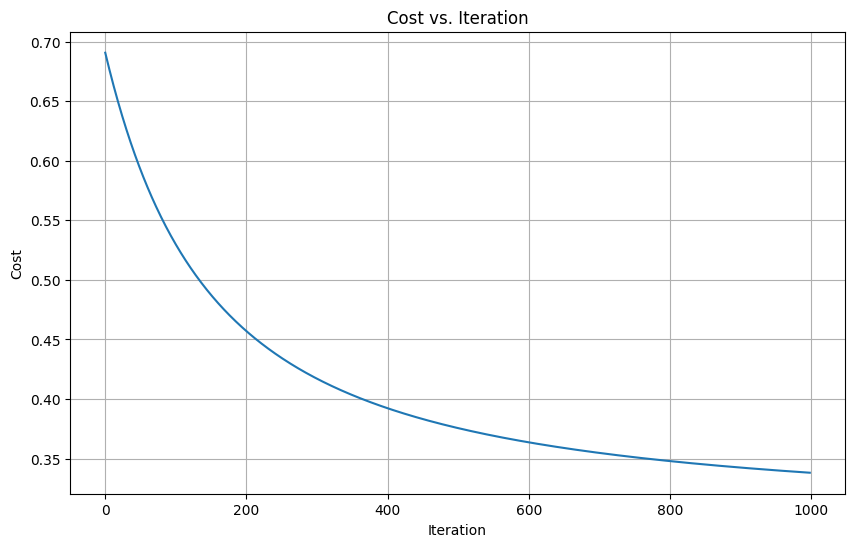

In [ ]:
# Plot the cost over iterations
plt.figure(figsize=(10, 6))
plt.plot(j_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.grid(True)
plt.show()

Predict on **X_test** using **w_final** and **b_final**

Plot

To plot **y_hat** (predicted values) against **y_test** (true values) for regression or classification tasks, you can use a scatter plot.

**y_test** should contain the true values **(ground truth).**
**y_hat** should contain the **predicted values generated by the model**.

The scatter function is used to create a scatter plot, where each point corresponds to a pair of true and predicted values. alpha=0.5 makes the points partially transparent to help visualize overlapping points.

The x-axis represents the true values (y_test), and the y-axis represents the predicted values (y_hat). **In an ideal scenario, all points would lie along a diagonal line (y=x), indicating a perfect match between predictions and true values.**

[1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1.]


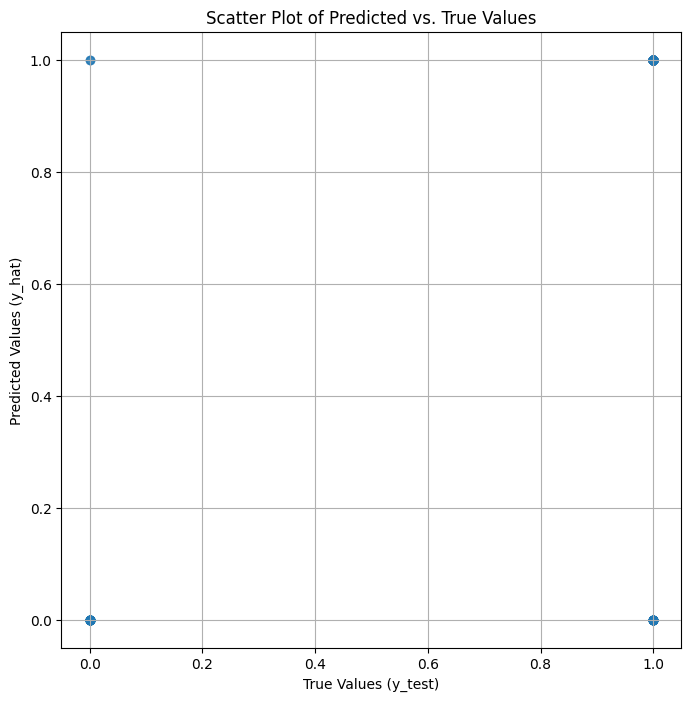

In [ ]:
X_test, mu, std = z_score_normalize(X_test)
z, y_hat = predict(X_test, w_final, b_final, 0.5)

# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_hat)')
plt.title('Scatter Plot of Predicted vs. True Values')
plt.grid(True)
plt.show()

In [ ]:
#Compute accuracy on our training set
z, g_z = predict(X_test, w_final,b_final, 0.5)
print('Train Accuracy: %f'%(np.mean(g_z == y_test) * 100))

[1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1.]
Train Accuracy: 85.964912


In [ ]:

# plot z vs g_z
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(z, g_z, c="b")

ax.set_title("Z vs g_z - Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

In [ ]:
w_in = np.zeros_like(X_train[0])
print(X_train[0])
print(w_in)

[1.0216632  0.91384216]
[0. 0.]


# cost vs weights and bias

TypeError: ignored

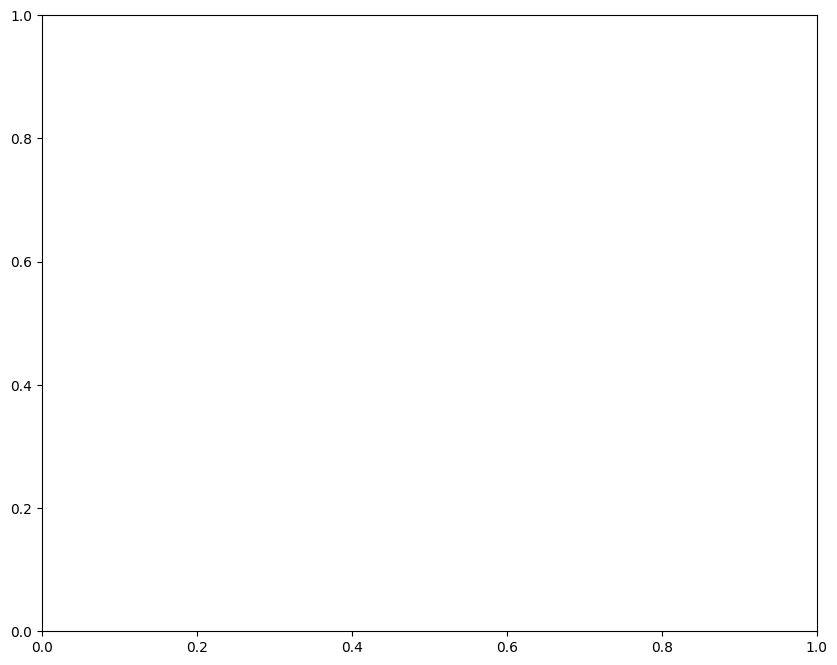

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have arrays:
# cost_array containing the cost values at different iterations.
# w_array containing weight values at different iterations.
# b_array containing bias values at different iterations.

# Create a grid of weight and bias values for the contour plot

w_hist = np.array(w_hist)
b_hist = np.array(b_hist)

w_range = np.linspace(min(w_hist.min(), -1), max(w_hist.max(), 1), 100)
b_range = np.linspace(min(b_hist.min(), -1), max(b_hist.max(), 1), 100)
W, B = np.meshgrid(w_range, b_range)

# Create a contour plot
plt.figure(figsize=(10, 8))

contour = plt.contour(W, B, j_hist, levels=20)

plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('Weight')
plt.ylabel('Bias')
plt.title('Cost vs. Weights and Bias')
plt.colorbar()
plt.grid(True)
plt.show()



In [ ]:
w_tmp  = np.zeros_like(X_train[0])
print(w_tmp)

[0. 0.]
